# House price prediction [🔗](https://www.kaggle.com/competitions/home-data-for-ml-course/data)
by kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Loading Data

In [3]:
house_data = pd.read_csv("../input/home-data-for-ml-course/train.csv", index_col="Id")
test_data = pd.read_csv("../input/home-data-for-ml-course/test.csv", index_col="Id")

pd.set_option("display.max_columns", house_data.shape[1])
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Selecting useful features

In [4]:
useful_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'RoofMatl', 
                   'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'Condition1', 'Condition2', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 
                   'ExterQual', 'ExterCond', 'Foundation', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'LandContour', 
                   'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'MSZoning', 
                   'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition']
house_data = house_data[useful_features + ["SalePrice"]]
test_data = test_data[useful_features]
len(useful_features)

50

## Splitting training & validating data

In [5]:
X = house_data.drop(columns="SalePrice")
y = house_data.SalePrice
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

### Extracting `categorical` columns & useful columns
- Using columns having no missing values
- dropping columns which doesn't have same values in training & validating data

In [6]:
cat_features = X.select_dtypes(exclude=(int, float)).columns

# Columns that can safely ordinal encoded
# excluding those columns which doesn't have same values in training & validating data
useful_cat_cols = [col for col in cat_features 
                 if set(X_valid[col]).issubset(set(X_train[col]))
                ]
unnecessary_cols = list(set(cat_features) - set(useful_cat_cols))
print('Categorical columns that will be ordinal encoded:', useful_cat_cols)
print('\nCategorical columns that will be dropped from the dataset:', unnecessary_cols)

Categorical columns that will be ordinal encoded: ['Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'Condition1', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'LandContour', 'KitchenQual', 'MSZoning', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['RoofMatl', 'Condition2', 'Functional']


#### dropping unnecessary columns

In [7]:
X_train.drop(columns=unnecessary_cols, inplace=True)
X_valid.drop(columns=unnecessary_cols, inplace=True)

## Doing `Ordinal Encoding` in categorical features

In [8]:
ord_encoder = OrdinalEncoder()
X_train[useful_cat_cols] = ord_encoder.fit_transform(X_train[useful_cat_cols])
X_valid[useful_cat_cols] = ord_encoder.transform(X_valid[useful_cat_cols])

In [9]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Condition1,YearBuilt,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,LandContour,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,MSZoning,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1293,70,60.0,6600,1.0,3.0,0.0,0.0,0.0,17.0,0.0,5.0,5,4,2.0,1892,1.0,13.0,14.0,3.0,4.0,4.0,994,1.0,4.0,0.0,1378,994,0,3.0,2,4,2,3.0,11,0,1,432,4.0,2.0,0,287,0,0,0,12,8.0,4.0
1019,80,NaN,10784,1.0,0.0,0.0,2.0,0.0,8.0,0.0,7.0,7,5,2.0,1991,1.0,6.0,6.0,2.0,4.0,2.0,384,1.0,2.0,1.0,802,670,0,3.0,2,3,1,2.0,7,1,2,402,3.0,2.0,164,0,0,0,0,5,8.0,4.0
1214,80,NaN,10246,1.0,0.0,0.0,1.0,0.0,19.0,0.0,7.0,4,9,2.0,1965,1.0,12.0,13.0,3.0,2.0,1.0,648,1.0,0.0,1.0,960,0,0,3.0,0,0,1,3.0,3,0,1,364,3.0,2.0,88,0,0,0,0,5,8.0,4.0
1431,60,60.0,21930,1.0,2.0,0.0,4.0,0.0,8.0,0.0,5.0,5,5,6.0,2005,1.0,12.0,13.0,2.0,4.0,2.0,732,1.0,0.0,1.0,734,1104,0,3.0,2,4,1,3.0,7,1,2,372,3.0,2.0,100,40,0,0,0,7,8.0,4.0
811,20,78.0,10140,1.0,3.0,0.0,4.0,0.0,14.0,0.0,2.0,6,6,2.0,1974,3.0,6.0,6.0,3.0,4.0,1.0,1040,1.0,1.0,1.0,1309,0,0,3.0,1,3,1,2.0,5,1,2,484,3.0,2.0,265,0,0,648,0,1,8.0,4.0


## Imputing mean to `missing values`

In [10]:
# Imputer will remove index & column names, so copying it
X_train_cols = X_train.columns
X_valid_cols = X_valid.columns
X_train_index = X_train.index

imputer = SimpleImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train_cols, index=X_train.index)
X_valid = pd.DataFrame(imputer.transform(X_valid), columns=X_valid_cols)

In [11]:
X_train.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
Condition1       0
YearBuilt        0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
LandContour      0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
MSZoning         0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MiscVal          0
MoSold           0
SaleType         0
SaleCondition    0
dtype: int64

## Creating `RandomForestRegressor` model and training it on training data
- `n_estimators` is no. of trees, default `100`.

In [12]:
def get_mae(X_train, X_valid, y_train, y_valid, n_estimators=100, random_state=0):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)
    return mean_absolute_error(y_valid, prediction)

In [13]:
mae = get_mae(X_train, X_valid, y_train, y_valid)
print(f"MAE on training/validating data with 100 trees: {mae:.0f}")

MAE on training/validating data with 100 trees: 18780


#### Checking `MAE` on different trees to know which parameter is best

In [14]:
trees = [10, 50, 100, 250, 500, 1000]
for tree in trees:
    mae = get_mae(X_train, X_valid, y_train, y_valid, n_estimators=tree)
    print(f"n_estimator: {tree}, MAE: {mae:.0f}")

n_estimator: 10, MAE: 20461
n_estimator: 50, MAE: 18994
n_estimator: 100, MAE: 18780
n_estimator: 250, MAE: 18514
n_estimator: 500, MAE: 18312
n_estimator: 1000, MAE: 18341


### So, `500 trees` are best option, as it has lowest MAE (`18312`)

### Checking difference in predictions and acutal validation

In [15]:
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
print(f"MAE: {mae:.0f}\nPredictions: {preds}")

MAE: 18312
Predictions: [207144.8   134395.002 108050.37  219770.406  94229.924 104431.298
 282289.492 119268.85  591541.89  156561.5   196142.92  160937.352
 217625.65  118324.144 136860.746 148274.024 215990.806 111741.706
 143155.55  161659.248 123291.326 144483.458 120534.184 165417.566
 195569.64  236550.712 170619.292  84700.632 345638.774 116521.218
 146007.918 193928.872 145277.872 303873.504 359903.198 197066.884
 287913.86  128475.152 239230.392 285448.7   199163.132 137328.674
 179079.488 302797.192 316667.296 154493.74  129297.072 129579.864
 172768.45  103745.204 371295.984 143808.474 168684.7    98694.17
 237585.062 121455.236 131151.198 269630.59  144238.702 111093.862
 149041.264 131338.234 145456.724 161563.404 184729.504 155820.118
 133557.606 226355.974 137326.998 205797.49  176577.482 125525.35
  96272.238 239072.726  95200.326 288494.006 129953.328 113961.008
 279477.008 149903.666 131728.88  128853.466 121299.804 142737.294
 189024.944 193720.81  105989.348 196216

### Plotting line graph

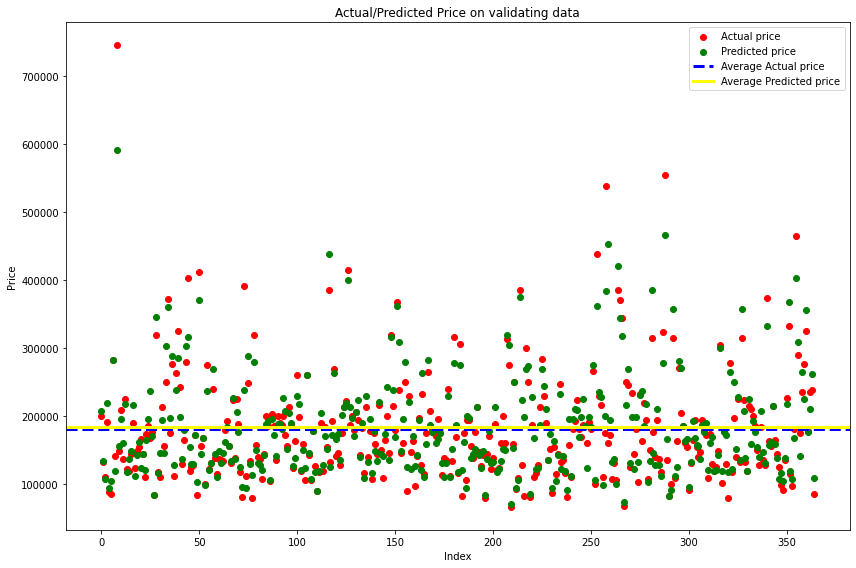

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Actual/Predicted Price on validating data")
plt.scatter(X_valid.index, y_valid, color="red", label="Actual price")
plt.scatter(X_valid.index, preds, color="green", label="Predicted price")
plt.axhline(y_valid.mean(), c="blue", linewidth=3, linestyle="--", label="Average Actual price")
plt.axhline(preds.mean(), c="yellow", linewidth=3, label="Average Predicted price")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()

## Training Model on Full dataset
1. Applying Ordinal Encoding on both `X` and `X_test` data
2. Using `RandomForestRegressor` to make the model
3. Submitting the predictions in the `House price prediction competiton`

### Applying `Ordinal Encoding` to the categorical columns
1. Dropping columns having values which are not in training / test data
2. then applying ordinal encoding to rest of the categorical columns

In [17]:
cat_cols = X.select_dtypes(exclude=(int, float))

# Columns that can safely ordinal encoded
# excluding those columns which doesn't have same values in training & test data
useful_cat_cols = [col for col in cat_features 
                   if set(test_data[col]).issubset(set(X[col]))
                  ]
unnecessary_cols = list(set(cat_cols) - set(useful_cat_cols))
print('Categorical columns that will be ordinal encoded:', useful_cat_cols)
print('\nCategorical columns that will be dropped from the dataset:', unnecessary_cols)

Categorical columns that will be ordinal encoded: ['Street', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'RoofMatl', 'BldgType', 'HouseStyle', 'Condition1', 'Condition2', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'LandContour', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior2nd', 'Utilities', 'KitchenQual', 'MSZoning', 'SaleType', 'Exterior1st', 'Functional']


In [18]:
# dropping unnecessary columns
X.drop(columns=unnecessary_cols, inplace=True)
test_data.drop(columns=unnecessary_cols, inplace=True)

In [19]:
ord_encoder = OrdinalEncoder()
X[useful_cat_cols] = ord_encoder.fit_transform(X[useful_cat_cols])
test_data[useful_cat_cols] = ord_encoder.transform(test_data[useful_cat_cols])

In [20]:
X.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LotConfig,LandSlope,Neighborhood,RoofMatl,BldgType,HouseStyle,OverallQual,OverallCond,Condition1,Condition2,YearBuilt,RoofStyle,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,LandContour,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1.0,3.0,4.0,0.0,5.0,1.0,0.0,5.0,7,5,2.0,2.0,2003,1.0,2.0,4.0,2.0,856,1.0,0.0,1.0,856,854,0,3.0,2,3,1,8,0,2,548,2.0,0,61,0,0,0,2,4.0
2,20,80.0,9600,1.0,3.0,2.0,0.0,24.0,1.0,0.0,2.0,6,8,1.0,2.0,1976,1.0,3.0,4.0,1.0,1262,1.0,0.0,1.0,1262,0,0,3.0,2,3,1,6,1,2,460,2.0,298,0,0,0,0,5,4.0
3,60,68.0,11250,1.0,0.0,4.0,0.0,5.0,1.0,0.0,5.0,7,5,2.0,2.0,2001,1.0,2.0,4.0,2.0,920,1.0,0.0,1.0,920,866,0,3.0,2,3,1,6,1,2,608,2.0,0,42,0,0,0,9,4.0
4,70,60.0,9550,1.0,0.0,0.0,0.0,6.0,1.0,0.0,5.0,7,5,2.0,2.0,1915,1.0,3.0,4.0,0.0,756,1.0,2.0,1.0,961,756,0,3.0,1,3,1,7,1,3,642,2.0,0,35,272,0,0,2,0.0
5,60,84.0,14260,1.0,0.0,2.0,0.0,15.0,1.0,0.0,5.0,8,5,2.0,2.0,2000,1.0,2.0,4.0,2.0,1145,1.0,0.0,1.0,1145,1053,0,3.0,2,4,1,9,1,3,836,2.0,192,84,0,0,0,12,4.0


In [21]:
X.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LotConfig          0
LandSlope          0
Neighborhood       0
RoofMatl           0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
Condition1         0
Condition2         0
YearBuilt          0
RoofStyle          0
ExterQual          0
ExterCond          0
Foundation         0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
LandContour        0
FullBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
PoolArea           0
MiscVal            0
MoSold             0
SaleCondition      0
dtype: int64

In [22]:
test_data.isna().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LotConfig          0
LandSlope          0
Neighborhood       0
RoofMatl           0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
Condition1         0
Condition2         0
YearBuilt          0
RoofStyle          0
ExterQual          0
ExterCond          0
Foundation         0
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
LandContour        0
FullBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
GarageArea         1
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
PoolArea           0
MiscVal            0
MoSold             0
SaleCondition      0
dtype: int64

### Imputing `mean` values to missing values using `SimpleImputer` in training & test data

In [23]:
# Imputer will remove index & column names, so copying it
X_cols = X.columns
test_data_cols = test_data.columns
test_index = test_data.index

imputer = SimpleImputer()
X = pd.DataFrame(imputer.fit_transform(X), columns=X_cols)
test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data_cols, index=test_index)

In [24]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LotConfig,LandSlope,Neighborhood,RoofMatl,BldgType,HouseStyle,OverallQual,OverallCond,Condition1,Condition2,YearBuilt,RoofStyle,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,LandContour,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20.0,80.0,11622.0,1.0,3.0,4.0,0.0,12.0,1.0,0.0,2.0,5.0,6.0,1.0,2.0,1961.0,1.0,3.0,4.0,1.0,882.0,1.0,4.0,1.0,896.0,0.0,0.0,3.0,1.0,2.0,1.0,5.0,0.0,1.0,730.0,2.0,140.0,0.0,0.0,0.0,0.0,6.0,4.0
1462,20.0,81.0,14267.0,1.0,0.0,0.0,0.0,12.0,1.0,0.0,2.0,6.0,6.0,2.0,2.0,1958.0,3.0,3.0,4.0,1.0,1329.0,1.0,4.0,1.0,1329.0,0.0,0.0,3.0,1.0,3.0,1.0,6.0,0.0,1.0,312.0,2.0,393.0,36.0,0.0,0.0,12500.0,6.0,4.0
1463,60.0,74.0,13830.0,1.0,0.0,4.0,0.0,8.0,1.0,0.0,5.0,5.0,5.0,2.0,2.0,1997.0,1.0,3.0,4.0,2.0,928.0,1.0,2.0,1.0,928.0,701.0,0.0,3.0,2.0,3.0,1.0,6.0,1.0,2.0,482.0,2.0,212.0,34.0,0.0,0.0,0.0,3.0,4.0
1464,60.0,78.0,9978.0,1.0,0.0,4.0,0.0,8.0,1.0,0.0,5.0,6.0,6.0,2.0,2.0,1998.0,1.0,3.0,4.0,2.0,926.0,1.0,0.0,1.0,926.0,678.0,0.0,3.0,2.0,3.0,1.0,7.0,1.0,2.0,470.0,2.0,360.0,36.0,0.0,0.0,0.0,6.0,4.0
1465,120.0,43.0,5005.0,1.0,0.0,4.0,0.0,22.0,1.0,4.0,2.0,8.0,5.0,2.0,2.0,1992.0,1.0,2.0,4.0,2.0,1280.0,1.0,0.0,1.0,1280.0,0.0,0.0,1.0,2.0,2.0,1.0,5.0,0.0,2.0,506.0,2.0,0.0,82.0,0.0,0.0,0.0,1.0,4.0


In [25]:
X.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
RoofMatl         0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
Condition1       0
Condition2       0
YearBuilt        0
RoofStyle        0
ExterQual        0
ExterCond        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
LandContour      0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MiscVal          0
MoSold           0
SaleCondition    0
dtype: int64

In [26]:
test_data.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
RoofMatl         0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
Condition1       0
Condition2       0
YearBuilt        0
RoofStyle        0
ExterQual        0
ExterCond        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
LandContour      0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MiscVal          0
MoSold           0
SaleCondition    0
dtype: int64

## Creating Final `RandomForestRegressor` model on full data

In [27]:
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X, y)
test_preds = model.predict(test_data)
test_preds

array([131761.468, 156181.882, 164386.736, ..., 171608.788, 116212.374,
       238958.654])

## Submitting `test_preds` predictions to `submission_5.csv`

In [28]:
output = pd.DataFrame(data={"Id" : test_data.index, "Saleprice" : test_preds})
output.to_csv("./submission_5.csv", index=False)